### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns   
import matplotlib.pyplot as plt  
sns.set(color_codes=True) 
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
file_data = pd.read_csv('Data.csv')
file_item = pd.read_csv('item.csv')
file_user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
# .info() gets the information about the data types for the data columns, tht number of values entered for each variables in the file.
# .shape gives the information on the number of rows and columns in the file.
# .isnull() checks if the data has any missing values. 


print('Information about the filename Data.csv:\n')
file_data.info() 

print('\nShape of the file Data.csv:',file_data.shape)

print('\nInformation about the filename item.csv:\n')
file_item.info()

print('\nShape of the file item.csv:',file_item.shape)

print('\nInformation about the filename user.csv:\n')
file_user.info()

print('\nShape of the file user.csv:',file_user.shape)


Information about the filename Data.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB

Shape of the file Data.csv: (100000, 4)

Information about the filename item.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir 

In [4]:
#.describe() gives the five number summary of the data in the file.
#.round() gives the rounded 

from IPython.display import display # the function displays multiple information.

display(file_data.describe().round(2), file_item.describe().round(2), file_user.describe().round(2)) 

,user id,movie id,rating,timestamp
count,100000.00,100000.00,100000.00,1.000000e+05
mean,462.48,425.53,3.53,8.835289e+08
std,266.61,330.80,1.13,5.343856e+06
min,1.00,1.00,1.00,8.747247e+08
25%,254.00,175.00,3.00,8.794487e+08
50%,447.00,322.00,4.00,8.828269e+08
75%,682.00,631.00,4.00,8.882600e+08
max,943.00,1682.00,5.00,8.932866e+08


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00
mean,841.84,0.00,0.15,0.08,0.02,0.07,0.30,0.06,0.03,0.43,0.01,0.01,0.05,0.03,0.04,0.15,0.06,0.15,0.04,0.02
std,485.64,0.02,0.36,0.27,0.16,0.26,0.46,0.25,0.17,0.50,0.11,0.12,0.23,0.18,0.19,0.35,0.24,0.36,0.20,0.13
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,842.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1262.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1682.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,user id,age
count,943.00,943.00
mean,472.00,34.05
std,272.36,12.19
min,1.00,7.00
25%,236.50,25.00
50%,472.00,31.00
75%,707.50,43.00
max,943.00,73.00


In [5]:
# isnull() looks for null values in the file and when followed with .sum() gives the total sum of null values for each data columns.
# display function is used to show multiple information together.

display(file_data.isnull().sum(), file_user.isnull().sum(), file_item.isnull().sum())

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [6]:
# Another way to do 

#round(file_item.iloc[:,3:].sum()/(file_item.iloc[:,3:].sum().sum())*100,2)


In [7]:
# creates a duplicate dataframe of 'item' after dropping the first 3 columns.
file_item_cpy = file_item.drop(['movie id','movie title','release date'], axis = 1)

# showing the dataframe with column name vs movie genre
pd.DataFrame(file_item_cpy.sum(), columns = ['Number of Movies per genre'])

,Number of Movies per genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [8]:

file_item_cpy2 = file_item.copy() # creates a duplicate dataframe of 'item'

file_item_cpy2['No. of Genre'] = file_item_cpy2[file_item_cpy2.columns[2:]].sum(axis=1) # adding a column which has the total sum of the genres

file_item_cpy2 = file_item_cpy2[file_item_cpy2['No. of Genre'] > 1] # gets the column values greater than 1 and stores in itself

file_item_cpy2[['movie id', 'movie title', 'release date', 'No. of Genre']].head() # display the first 5 rows for the selected columns.

,movie id,movie title,release date,No. of Genre
0,1,Toy Story,01-Jan-1995,3
1,2,GoldenEye,01-Jan-1995,3
3,4,Get Shorty,01-Jan-1995,3
4,5,Copycat,01-Jan-1995,3
6,7,Twelve Monkeys,01-Jan-1995,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [9]:
print('The total number of movies:',file_item['movie id'].count()) # Number of movies in the original file

file_item_cpy3=file_item.copy()

print('\nThe number of movies with unknown genre are:',file_item_cpy3['unknown'].sum())
print('\nInformation about the movie which has unknown genre:')
file_item_cpy3.loc[file_item_cpy3['unknown'] == 1]


The total number of movies: 1681

The number of movies with unknown genre are: 1

Information about the movie which has unknown genre:


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# removing the rows with column name unknown having greater than 0 values
file_item_cpy3.drop(file_item_cpy3[file_item_cpy3.unknown > 0].index, inplace = True)

print('\nThe total number of movies:',file_item_cpy3['movie id'].count())

print('\nThe movie id 1373 is dropped from the data as below:')
file_item_cpy3.iloc[1369:1373] # to display the movie id 1371 is dropped from the file.


The total number of movies: 1680

The movie id 1373 is dropped from the data as below:


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1369,1371,"Machine, The",01-Jan-1994,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1370,1372,"Stranger, The",01-Jan-1994,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1374,Falling in Love Again,01-Jan-1980,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1373,1375,"Cement Garden, The",01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [11]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [12]:
a = 'My*cat*is*brown'
#print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
print(a[-5:])

brown


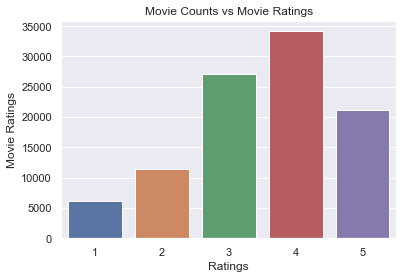

In [13]:
sns.countplot(file_data['rating']); # the syntax plots the count plot for number of movie counts vs ratings

# Following commands adds the labels & title to the graph
plt.xlabel('Ratings')
plt.ylabel('Movie Ratings')
plt.title('Movie Counts vs Movie Ratings')

plt.show()

C:\Users\arrpn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


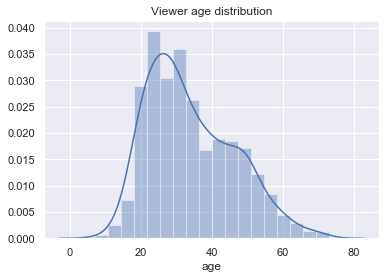

In [14]:
sns.distplot(file_user['age']); # the syntax plots the distribution plot of the user age.

plt.title('Viewer age distribution')
plt.show()

In [15]:
rel_date = file_item_cpy3.copy() # the dataframe with dropped movie which had unknown genre

rel_date.drop(['unknown'], axis = 1, inplace = True) # dropping the column named unknown

print('Format of the release date:')
display(rel_date['release date'].head(),rel_date['release date'].tail()) #display of the release date format
print(' ')

print('\nNumber of movies in the file:',rel_date['movie id'].count())

Format of the release date:


0    01-Jan-1995
1    01-Jan-1995
2    01-Jan-1995
3    01-Jan-1995
4    01-Jan-1995
Name: release date, dtype: object

1676    06-Feb-1998
1677    06-Feb-1998
1678    01-Jan-1998
1679    01-Jan-1994
1680    08-Mar-1996
Name: release date, dtype: object

 

Number of movies in the file: 1680


In [16]:
rel = rel_date['release date'].str.split('-', n = 3, expand = True) # splitting the release year colum into 3 parts
rel_date['year'] = rel[2].astype(int) # storing the 3rd part (year) in a separate column as integer type.

rel_date.head() #display of the data which now includes new column (at the end) of years as well. 

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


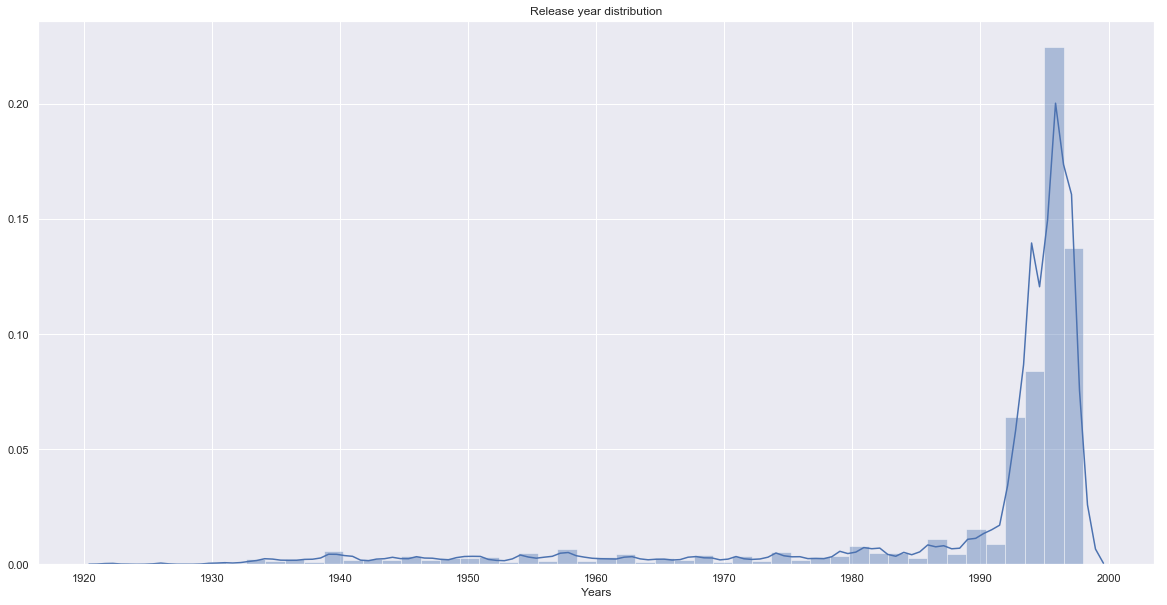

In [17]:
fig = plt.figure(figsize = (20,10))  #used to change the figure size

sns.distplot(rel_date['year']); # the syntax plots the distribution plot of the user age.

plt.title('Release year distribution')
plt.xlabel('Years')
plt.show()

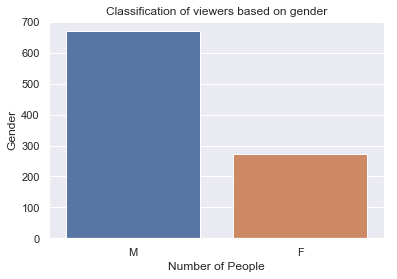

In [18]:
sns.countplot(file_user['gender']); # the syntax plots the count plot for number of movie counts vs ratings

# Following commands adds the labels & title to the graph
plt.xlabel('Number of People')
plt.ylabel('Gender')
plt.title('Classification of viewers based on gender')
plt.show()

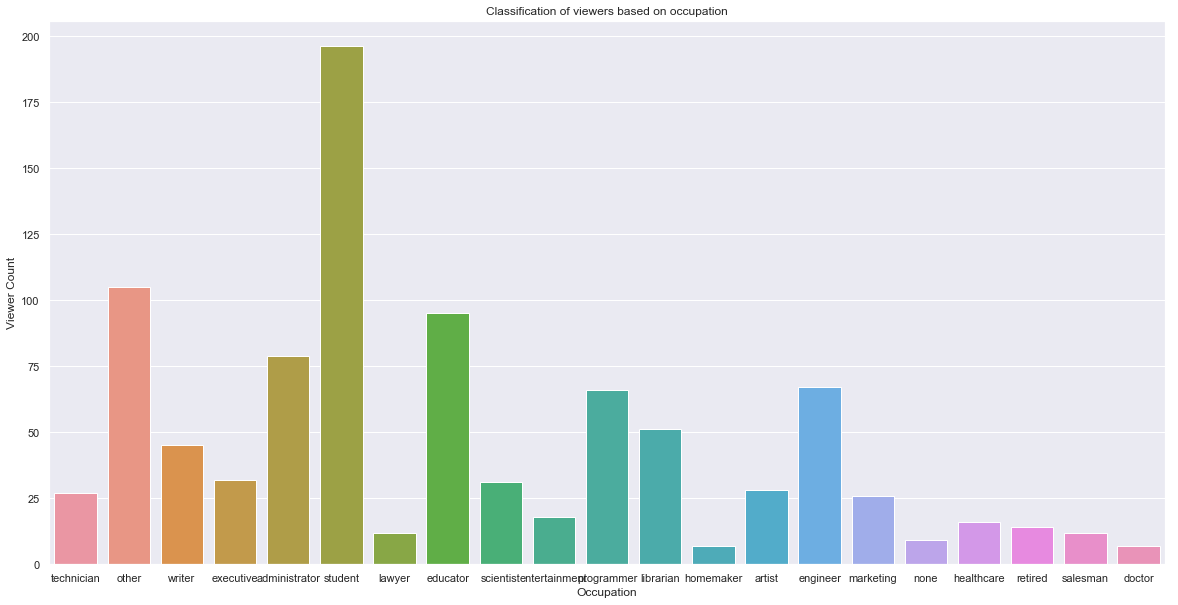

In [19]:
fig = plt.figure(figsize = (20,10))  #used to change the figure size

sns.countplot(file_user['occupation']); # the syntax plots the count plot for number of movie counts vs ratings

# Following commands adds the labels & title to the graph
plt.xlabel('Occupation')
plt.ylabel('Viewer Count')
plt.title('Classification of viewers based on occupation')

plt.show()

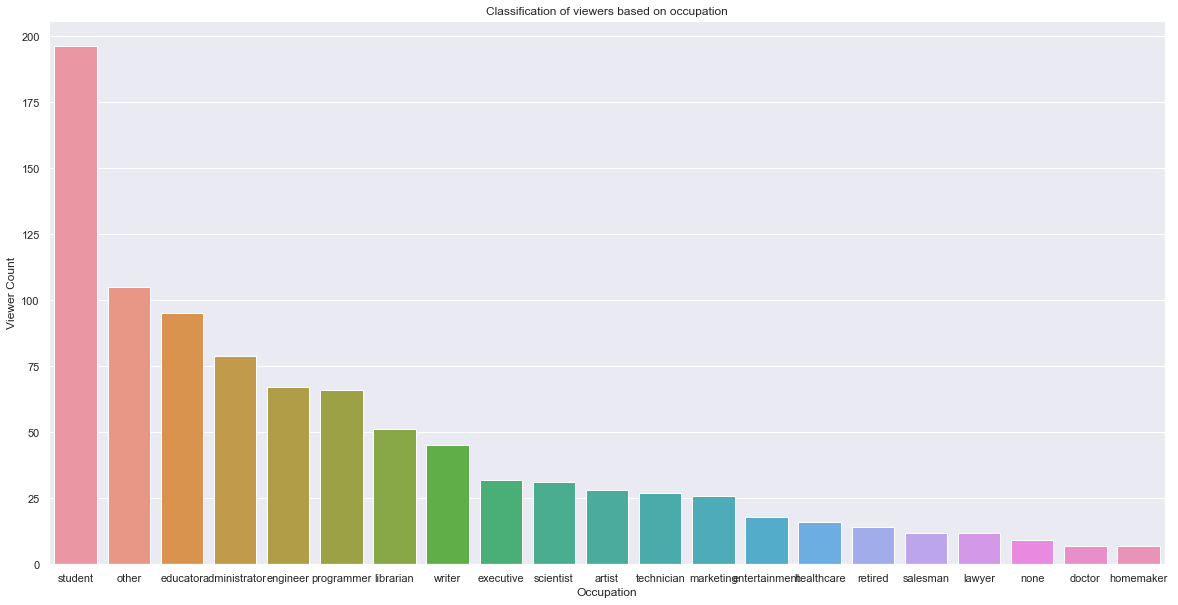

In [20]:
# The plot above is not sorted. 


fig = plt.figure(figsize = (20,10))  #used to change the figure size

sns.countplot(file_user['occupation'],order = file_user['occupation'].value_counts().index); # the syntax plots the count plot for number of movie counts vs ratings

# Following commands adds the labels & title to the graph
plt.xlabel('Occupation')
plt.ylabel('Viewer Count')
plt.title('Classification of viewers based on occupation')

plt.show()


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

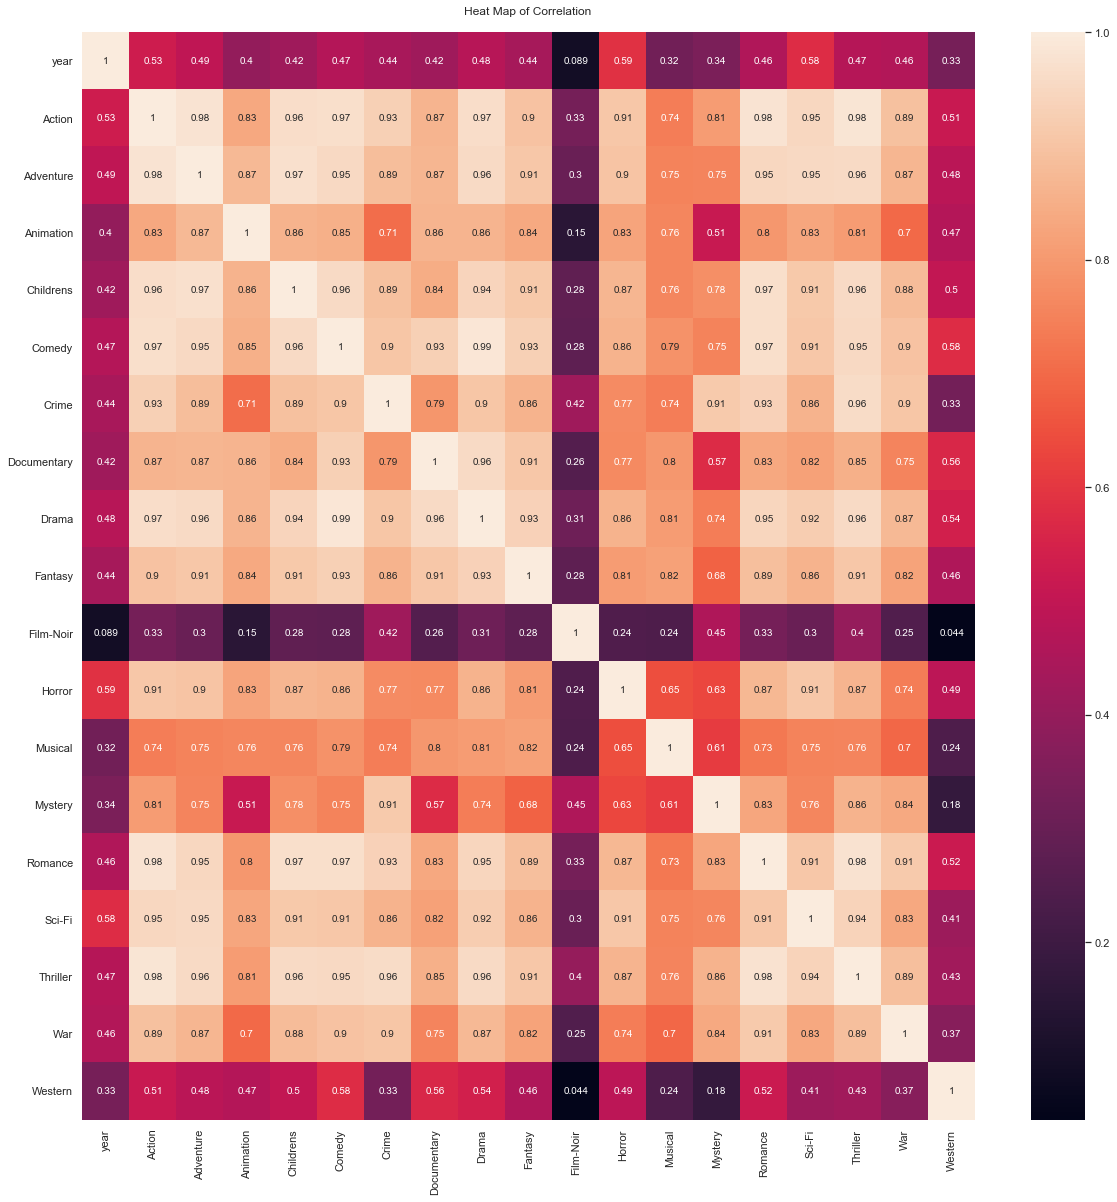

In [25]:
# making a sorted copy of dataframe in ascending order of the year column
rel_date_cpy = rel_date.sort_values(['year'], ascending = True).copy()

# grouping the years column against the sum of individual genres
rel_date_cpy2 = rel_date_cpy.groupby('year')['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'].sum().reset_index()

# the syntax gets the correlation between the numeric variables
cor = rel_date_cpy2.corr() 

fig, ax = plt.subplots()
fig.set_size_inches(20,20)

plt.title('Heat Map of Correlation \n')

sns.heatmap(cor, annot = True)

plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [22]:
# The syntax below sorts the data in movie id.
file_data_sorted = file_data.sort_values(['movie id'], ascending = True)

# Syntax groups the data by movie id, counts the user id and returns the sum of ratings.
file_data_sorted  = file_data_sorted.groupby('movie id').agg({'rating' : 'sum','user id' : 'count'}).reset_index()

# Below syntax sorts the above data in descending order for Ratings given by number of users.
file_data_sorted.rename({'user id':'Ratings given by number of users', 'rating':'TotalRatings'}, axis = 1, inplace = True)

# Taking only the rows which have total ratings greater than value 100.
file_data_sorted = file_data_sorted[file_data_sorted.TotalRatings > 100]

# Creating a columns for the average of the total ratings and sorting them in descending order. 
file_data_sorted['AverageRatings'] = file_data_sorted['TotalRatings'] / file_data_sorted['Ratings given by number of users']
file_data_sorted.sort_values(['AverageRatings'], ascending = False, inplace = True)

file_item_cpy1 = file_item.copy()

#Dropping the genre from the dataframe
file_item_cpy1.drop(file_item_cpy1.iloc[: , 2:],inplace = True,axis = 1) 

# Merging the above dataframe based on movie id to the above sorted dataframe of average ratings.
file_mrge_avg = file_data_sorted.merge(file_item_cpy1, on = 'movie id')

print('Top 25 movies according to average rating which had more than 100 users giving the rating are:\n\n')
file_mrge_avg.round(2).head(25)

Top 25 movies according to average rating which had more than 100 users giving the rating are:




,movie id,TotalRatings,Ratings given by number of users,AverageRatings,movie title
0,408,503,112,4.49,"Close Shave, A"
1,318,1331,298,4.47,Schindler's List
2,169,527,118,4.47,"Wrong Trousers, The"
3,483,1083,243,4.46,Casablanca
4,114,298,67,4.45,Wallace & Gromit: The Best of Aardman Animation
5,64,1258,283,4.45,"Shawshank Redemption, The"
6,603,917,209,4.39,Rear Window
7,12,1171,267,4.39,"Usual Suspects, The"
8,50,2541,583,4.36,Star Wars
9,178,543,125,4.34,12 Angry Men


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [23]:
# The syntax below creates the dataframe with movie id and drama, romance and sci-fi genre only

file_drama = file_item.copy() # creating a dataframe copy file_item

# keepng the necessary columns
file_drama.drop(file_drama.iloc[: , 1:11],inplace = True,axis = 1) 
file_drama.drop(file_drama.iloc[: , 2:7],inplace = True,axis = 1) 
file_drama.drop(file_drama.iloc[: , 4:],inplace = True,axis = 1) 

# The commands sorts the data from filename Data for movie id, then dropped the unwanted columns
file_data_sorted1 = file_data.sort_values(['movie id'], ascending = True)
file_data_sorted1.drop(['timestamp','rating'], axis = 1, inplace = True)

# The syntax merges the above generated dataframe with movie id and the movie genre with the sorted movie id dataframe.

file_merged = file_data_sorted1.merge(file_drama, on = 'movie id')

# Sorting the dataframe based on user id
file_merged = file_merged.sort_values(['user id'], ascending = True)

# Working on getting the gender list

gender = file_user.copy()

# The syntax drops the age, occupation & zip code columns and merges the above created dataframe w.r.t. the user id.

gender = gender.drop(['age','occupation','zip code'], axis = 1)

file_gen_merge = gender.merge(file_merged, on = 'user id')

# The syntax counts the number of male & female agains the specified movie genres and prints the values. 

drama = file_gen_merge.groupby('gender')['Drama'].count()
scifi = file_gen_merge.groupby('gender')['Sci-Fi'].count()
rom = file_gen_merge.groupby('gender')['Romance'].count()

print(drama,'\n\n\n',scifi,'\n\n\n',rom)


gender
F    25738
M    74253
Name: Drama, dtype: int64 


 gender
F    25738
M    74253
Name: Sci-Fi, dtype: int64 


 gender
F    25738
M    74253
Name: Romance, dtype: int64


In [24]:
print('The hypothesis of Men watching more Drama movies than Women is True based on the above counts\n\n')

print('The hypothesis of Women watching more Sci-Fi movies than Men is False based on the above counts\n\n')

print('The hypothesis of Men watching more Romance movies than Women is True based on the above counts.')


The hypothesis of Men watching more Drama movies than Women is True based on the above counts


The hypothesis of Women watching more Sci-Fi movies than Men is False based on the above counts


The hypothesis of Men watching more Romance movies than Women is True based on the above counts.
